# Project - NLP-Sentiment Analysis

### Project Objective: - Extracting sentiments from customer reviews on iPhone 16

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
from nltk.corpus import stopwords
from collections import Counter

## Load dataset

In [7]:
df = pd.read_excel('https://raw.githubusercontent.com/snehuuu28/Sentiment-Analysis/main/IPhone%2016%20all%20variants%20Amazon%20reviews.xlsx')
df

,Unnamed: 0,name,rating,review_text
0,0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...,...
348,348,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
349,349,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
350,350,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
351,351,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


## Understanding the features: -


#### 1. name: Registered names of the customers giving the reviews
#### 2. rating: Ratings provided by the customers
#### 3. review_text: Customer reviews on Iphone 16


## EDA

#### 1. Initial EDA

In [11]:
# Let's check the datatypes of features
df.dtypes

Unnamed: 0      int64
name           object
rating         object
review_text    object
dtype: object

In [12]:
# We can remove 'Unnamed: 0' feature as it is not adding any value to our project.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Let's change the feature name 'review_text' to 'customer_reviews' for clear understanding

df.rename(columns={'review_text':'customer_reviews'}, inplace=True)

In [14]:
df

,name,rating,customer_reviews
0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...
348,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
349,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
350,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
351,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


In [15]:
# Check missing data in reviews feature

df.isna().sum()

name                 0
rating               0
customer_reviews    13
dtype: int64

In [16]:
# We can see we have 13 missing values in the reviews column.
# We can simply remove these missing records as they are not in significantly higher number for our further analysis.

df.dropna(subset=['customer_reviews'], inplace=True)

In [17]:
# Checking missing values have been removed

df.isna().sum()

name                0
rating              0
customer_reviews    0
dtype: int64

In [18]:
# We can now see that the dataset don't have any missing record

In [19]:
# Let's reset the index after missing records removal

df.reset_index(drop=True, inplace=True)
df

,name,rating,customer_reviews
0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...
335,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
336,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
337,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
338,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


In [20]:
df.duplicated().sum()

0

In [21]:
# We can see there are no duplicate records extracted from the Amazon website.

In [22]:
# Extract numerical ratings from text and convert to float

df["rating"] = df["rating"].astype(str).str.extract(r"(\d+\.\d+)").astype(float)
df.head()

,name,rating,customer_reviews
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0,\nA good phone at a good price\n
2,Amazon Customer,5.0,\nBest product\n
3,Ali,4.0,"\nNice product,\n"
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...


In [23]:
# Import libraries for sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
analyzer = SentimentIntensityAnalyzer()

In [26]:
def analyze_sentiment(Data):
  scores = analyzer.polarity_scores(Data)
  if scores['compound'] >= 0.05:
    return 'Positive'
  else:
    return 'Negative'

In [27]:
df['sentiment'] = df['customer_reviews'].apply(analyze_sentiment)
df

,name,rating,customer_reviews,sentiment
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...,Positive
1,Alok,5.0,\nA good phone at a good price\n,Positive
2,Amazon Customer,5.0,\nBest product\n,Positive
3,Ali,4.0,"\nNice product,\n",Positive
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...,Positive
...,...,...,...,...
335,Wajid Nazir,5.0,\nI recently upgraded to the iPhone 16 Pro Max...,Positive
336,Ayush Gaikwad,5.0,"\nVery good it is the best phone, i would alwa...",Positive
337,GANESH KEYAL,1.0,"\niphone is mental same camra in iphone 14,15,...",Positive
338,Bikash,5.0,"\nGreat product. Colour,design,camera is just ...",Positive


#### 2. Text cleaning

In [29]:
# Let's clean the text by removing unnecessary characters, converting it to lowercase, split into words, remove common words,
# reduce words to their base form, and store the processed text for further use.

In [30]:
lemma = WordNetLemmatizer()

In [31]:
len(df)

340

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words("english")) - {"not", "never", "no", "very", "too", "few", "more", "less"}
lemmatizer = WordNetLemmatizer()

In [34]:
def clean_text(text):
        text = re.sub(r'[^a-zA-Z\s]', '', text).lower() # Remove punctuation and convert to lowercase
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]) # Lemmatization & Remove stop words
        return text

In [35]:
# Generate a new feature with cleaned text of customer reviews
df['cleaned_reviews'] = df['customer_reviews'].apply(clean_text)
df

,name,rating,customer_reviews,sentiment,cleaned_reviews
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...,Positive,upgrading iphone absolute breeze apple refined...
1,Alok,5.0,\nA good phone at a good price\n,Positive,good phone good price
2,Amazon Customer,5.0,\nBest product\n,Positive,best product
3,Ali,4.0,"\nNice product,\n",Positive,nice product
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...,Positive,definately go itthis colour also give amezing ...
...,...,...,...,...,...
335,Wajid Nazir,5.0,\nI recently upgraded to the iPhone 16 Pro Max...,Positive,recently upgraded iphone pro max gb exceeded e...
336,Ayush Gaikwad,5.0,"\nVery good it is the best phone, i would alwa...",Positive,very good best phone would always consider buy...
337,GANESH KEYAL,1.0,"\niphone is mental same camra in iphone 14,15,...",Positive,iphone mental camra iphone world best phone sa...
338,Bikash,5.0,"\nGreat product. Colour,design,camera is just ...",Positive,great product colourdesigncamera wow battery b...


In [36]:
# Remove redundant feature -> customer_reviews

df.drop(columns=['customer_reviews'], inplace=True)

In [37]:
df.head()

,name,rating,sentiment,cleaned_reviews
0,Ashwani Jha,5.0,Positive,upgrading iphone absolute breeze apple refined...
1,Alok,5.0,Positive,good phone good price
2,Amazon Customer,5.0,Positive,best product
3,Ali,4.0,Positive,nice product
4,Asif ahmef,5.0,Positive,definately go itthis colour also give amezing ...


#### 3. Rating distribution

rating
5.0    193
1.0     65
4.0     52
3.0     20
2.0     10
Name: count, dtype: int64

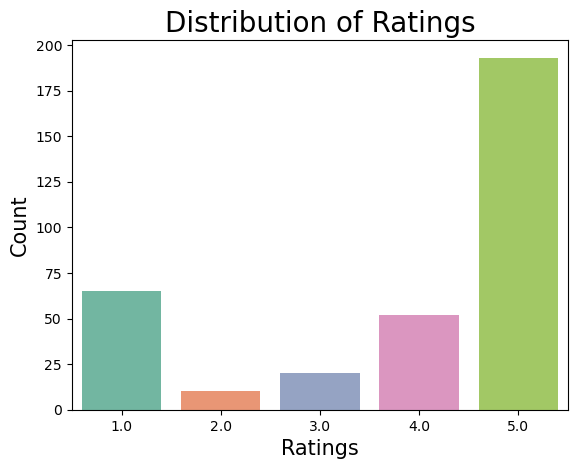

In [39]:
sns.countplot(x='rating', palette='Set2', data=df)
plt.title('Distribution of Ratings', size=20)
plt.xlabel('Ratings', size=15)
plt.ylabel('Count', size=15)

df['rating'].value_counts()

In [40]:
# Interpretation of Ratings Distribution: -

# 1. A large majority of the reviews (193 out of 340) have a rating of 5.0, indicating a strong positive sentiment
#    towards the product.
# 2. While positive ratings dominate, there's a notable number of 1.0 ratings (65), suggesting some users
#    have negative experiences.
# 3. The counts for ratings 2.0, 3.0, and 4.0 are relatively low compared to 1.0 and 5.0, implying most users
#    have either strongly positive or strongly negative opinions.

#### 4. Text length

In [42]:
# Creating the review length feature after text cleaning process and not before text cleaning because: -

# 1. By calculating review length after cleaning, we capture the length of the meaningful content. Cleaning removes noise
#    and irrelevant elements (punctuation, stop words) that don't contribute to the sentiment or overall meaning of the review.
# 2. Using the cleaned text for length calculation helps the model focus on the essential words and phrases that carry sentiment.
# 3. Since the sentiment analysis and other NLP tasks will be performed on the cleaned text, it makes sense to align the
#    review length feature with that same data to maintain consistency.

In [43]:
# Create a new feature representing the length of the reviews

df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
df

,name,rating,sentiment,cleaned_reviews,review_length
0,Ashwani Jha,5.0,Positive,upgrading iphone absolute breeze apple refined...,61
1,Alok,5.0,Positive,good phone good price,4
2,Amazon Customer,5.0,Positive,best product,2
3,Ali,4.0,Positive,nice product,2
4,Asif ahmef,5.0,Positive,definately go itthis colour also give amezing ...,25
...,...,...,...,...,...
335,Wajid Nazir,5.0,Positive,recently upgraded iphone pro max gb exceeded e...,172
336,Ayush Gaikwad,5.0,Positive,very good best phone would always consider buy...,14
337,GANESH KEYAL,1.0,Positive,iphone mental camra iphone world best phone sa...,13
338,Bikash,5.0,Positive,great product colourdesigncamera wow battery b...,13


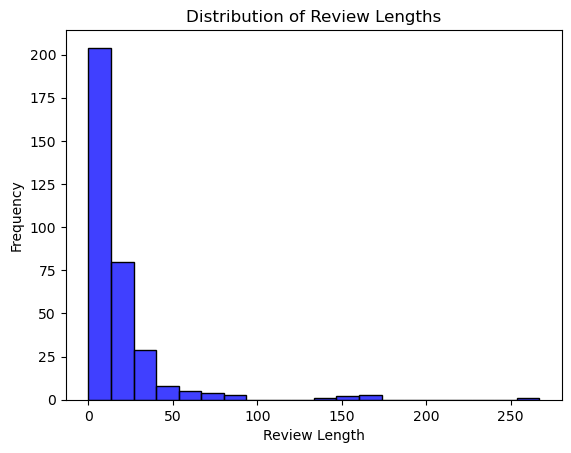

In [44]:
# Visualizing distribution of review lengths

sns.histplot(df['review_length'], bins = 20, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [45]:
# From above plot it is clear that most of the reviews have very few meaningful words.

#### 5. WordCloud & N-grams

In [47]:
# Let's generate Word Cloud to see high frequency words in the Iphone16 reviews

In [48]:
df['cleaned_reviews']

0      upgrading iphone absolute breeze apple refined...
1                                  good phone good price
2                                           best product
3                                           nice product
4      definately go itthis colour also give amezing ...
                             ...                        
335    recently upgraded iphone pro max gb exceeded e...
336    very good best phone would always consider buy...
337    iphone mental camra iphone world best phone sa...
338    great product colourdesigncamera wow battery b...
339    phone pro max every thing except video button ...
Name: cleaned_reviews, Length: 340, dtype: object

In [49]:
# Let's prepare the customer review data for generating WordCloud by combining all reviews into a single,
# and space-separated string
txt = ' '.join(df['cleaned_reviews'])
txt

'upgrading iphone absolute breeze apple refined transition process making data transfer old iphone effortless few tap everythingfrom apps settingsmoved flawlessly making switch feel seamlessthe performance topnotch unparalleled smoothness navigation app responsiveness multitasking enhanced battery life display quality camera feature make worthy upgrade anyone looking best smartphone experienceif youre considering upgrade iphone wont disappoint apple continues set standard premium smartphones highly recommended good phone good price best product nice product definately go itthis colour also give amezing feelone more thing using iqoo zpro hz display iphone hz surprisingly feel like hz dont worry refresh rate beast device super happy purchase writing formally complain recent purchase iphone online amazoni received item day purchase upon unboxing noticed iphone came mismatched muddled box powered phone stuck hello screen repeatedly displaying hello multiple language completely unresponsive

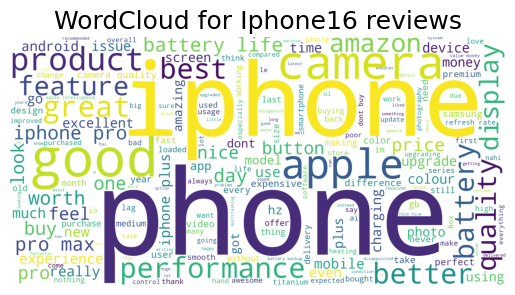

In [50]:
wc = WordCloud(background_color='white', height=1000, width=2000).generate(txt)

plt.title('WordCloud for Iphone16 reviews', size=18)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [51]:
# Applying N-grams technique to get frequency of most occuring words and word associations

def plot_ngrams(df, n=1):
  vectorizer = CountVectorizer(ngram_range=(n, n))
  ngrams = vectorizer.fit_transform(df['cleaned_reviews'])
  ngrams_freq = ngrams.sum(axis=0).A1 # .A1 attribute converts the matrix obtained in the previous step into a 1-dimensional NumPy array. This makes it easier to work with the frequency data.
  ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
  ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False)
  ngrams_df = ngrams_df.head(20)


  plt.figure(figsize=(15,10))
  sns.barplot(x='Frequency', y=ngrams_df.index, data=ngrams_df, palette='viridis')
  plt.title(f'Top 20 {n}-grams')
  plt.show()

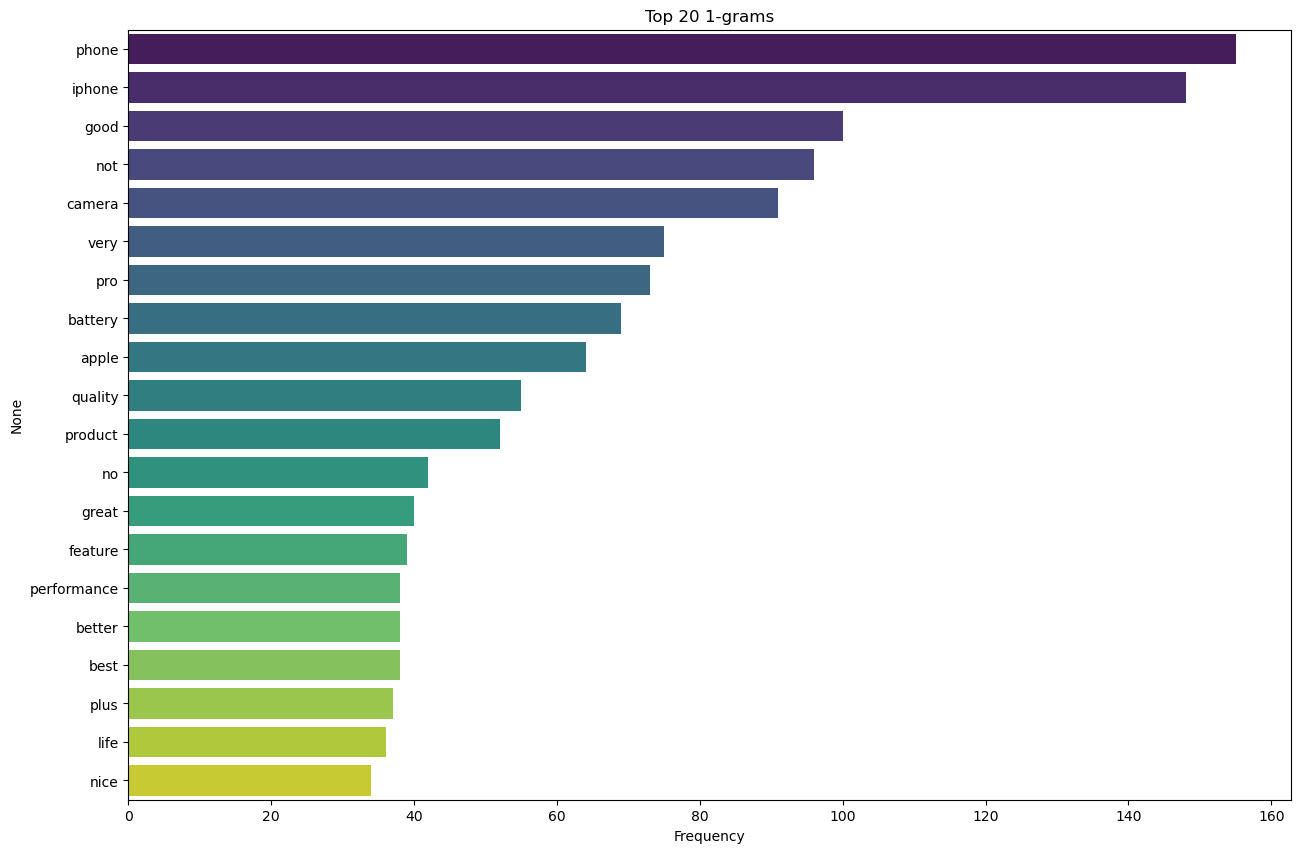

In [52]:
# Unigrams
plot_ngrams(df, n=1)

In [53]:
# Conclusion from WordCloud and Unigram bar plot: -

# 1. Prominent words: The words that appear larger in the word cloud, such as 'phone', 'good' and 'iphone'
#    indicate that these are the most frequently mentioned words in the customer reviews.

# 2. Overall sentiment: The prominent presence of positive words like 'good', 'great', 'best' and 'nice' suggests a generally positive sentiment
#    towards the iPhone 16 among customers.

# 3. Key themes: The prominent words related to features like 'camera', 'battery' and 'display' highlight the key aspects
#    that customers focus on when reviewing the iPhone 16.

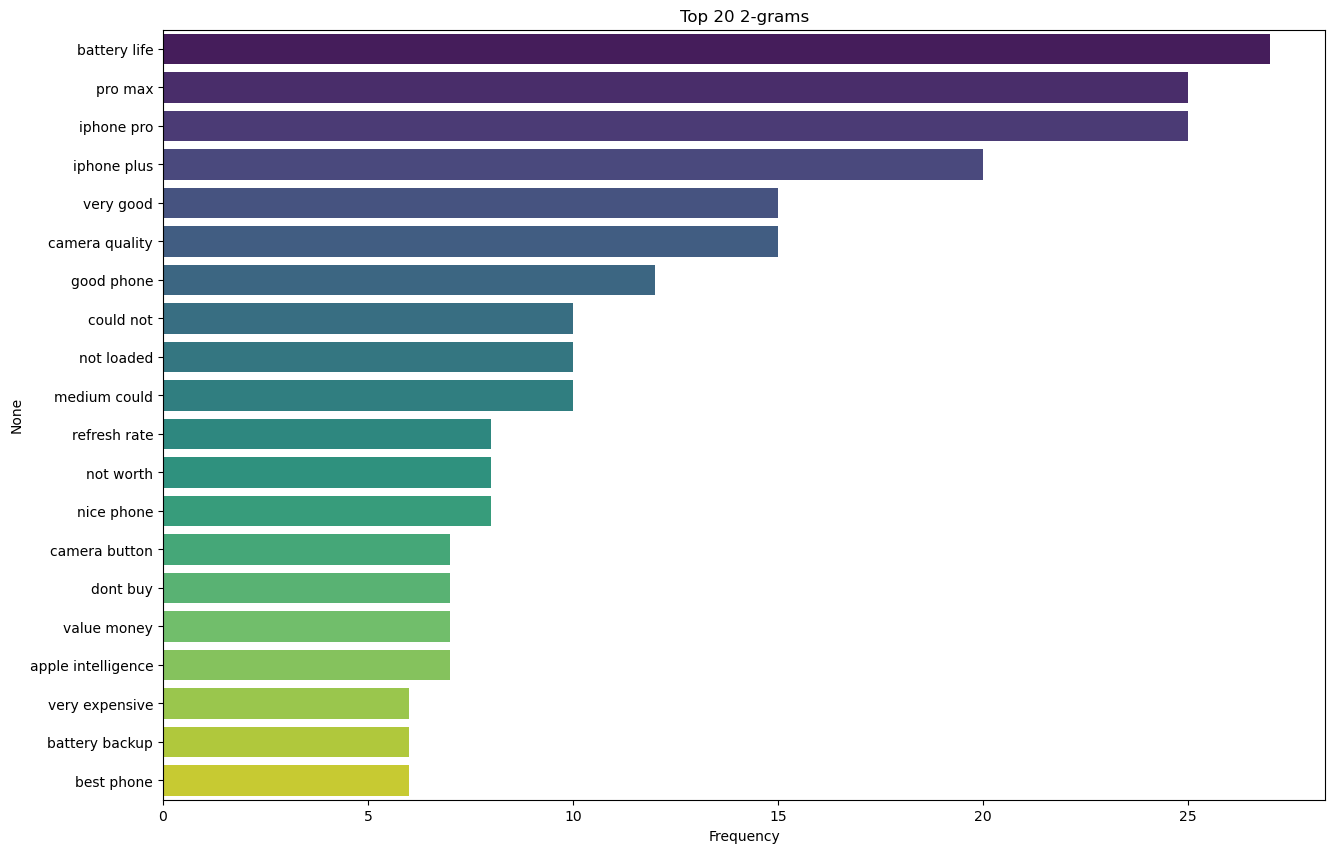

In [54]:
# Let's find out most frequent word associations in the reviews (Bi-grams)

plot_ngrams(df, n=2)

In [55]:
# Most frequently occuring Bi-grams include 'battery life', 'pro max', 'iphone pro', 'iphone plus', 'very good', 'camera quality'
# and 'good phone'. This data suggests that there is a general positive sentiment in the reviews as in unigrams and bigrams data
# most frequently occuring words/phrases express a positive sentiment.

# This inference need to be further validated using Sentiment Distribution Analysis.

#### 6. Sentiment Distribution Analysis

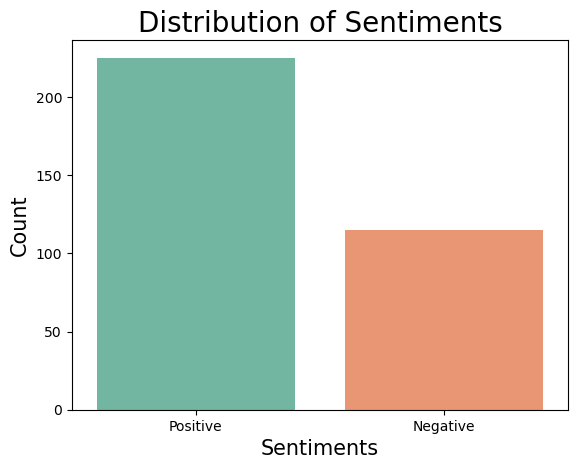

sentiment
Positive    225
Negative    115
Name: count, dtype: int64

In [57]:
# Get the distribution of sentiments

sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments', size=20)
plt.xlabel('Sentiments', size=15)
plt.ylabel('Count', size=15)
plt.show()

df['sentiment'].value_counts()

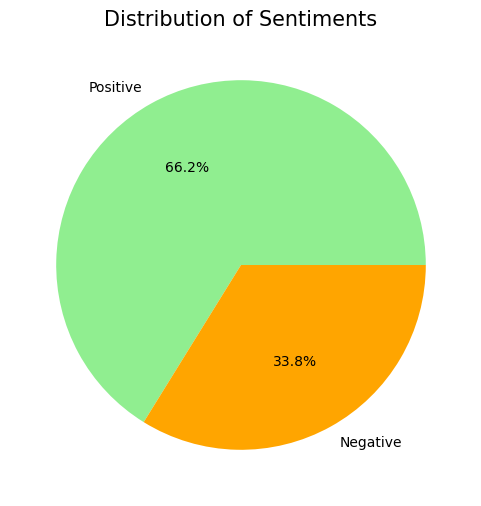

In [58]:
# Visualizing sentiment distribution using pie chart

df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['lightgreen', 'orange', 'lightblue'])
plt.title('Distribution of Sentiments', size=15)
plt.ylabel('')
plt.show()

In [59]:
# Conclusion and inferences from Sentiment Distribution Analysis of Iphone16 reviews: -

# 1. Positive: 66.2% of the reviews expressed a positive sentiment towards the iPhone 16.
# 2. Negative: 33.8% of the reviews expressed a negative sentiment towards the iPhone 16.

### Inference from Sentiment Distribution Analysis:

##### Overall, the sentiment analysis suggests that customer sentiment towards the iPhone 16 is predominantly positive.This indicates a generally favorable reception of the product by the majority of users. However, it is important to acknowledge the presence of negative sentiments as well and it is advisable to continuously monitor the customer feedback and conduct regular sentiment analysis to track the evolving perceptions of the iPhone 16 in the market.

## Model Building

#### 1. TF-IDF

In [63]:
# Import necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

In [65]:
y = df['sentiment']

In [66]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, shuffle=True)

In [67]:
# Now, let's train a sentiment classifier.

#### 2. Selecting the best sentiment classifier model

In [69]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
# Define models and hyperparameters

models = {
    'Logistic Regression' : {
    'model' : LogisticRegression(), 'params' : {'C' : [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'] }
    },

    'SVM' : {
    'model' : SVC(), 'params' : {'C' : [0.1, 1, 10, 100], 'kernel' : ['linear', 'rbf', 'poly']}
    },

    'Naive_Bayes' : {
    'model' : MultinomialNB(), 'params' : {}
    },

    'Random Forest' : {
    'model' : RandomForestClassifier(), 'params' : {'n_estimators' : [50, 100, 200], 'max_depth' : [5, 6, 7]}
    }
}

In [71]:
# Train and evaluate models

best_model = None
best_accuracy = 0
best_params = {}

for model_name, model_data in models.items():
  grid_search = GridSearchCV(model_data['model'], model_data['params'], cv=5, scoring = 'accuracy')
  grid_search.fit(X_train_tfidf, y_train)

  y_pred = grid_search.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"{model_name}: ")
  print(f"Best Parameters: {grid_search.best_params_}")
  print(f"Accuracy: {accuracy}")
  print(classification_report(y_test, y_pred))

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model_name
    best_params = grid_search.best_params_

print(f"\n Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: {best_params}")

Logistic Regression: 
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

    Negative       0.70      0.58      0.64        24
    Positive       0.79      0.86      0.83        44

    accuracy                           0.76        68
   macro avg       0.75      0.72      0.73        68
weighted avg       0.76      0.76      0.76        68

SVM: 
Best Parameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

    Negative       0.77      0.71      0.74        24
    Positive       0.85      0.89      0.87        44

    accuracy                           0.82        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.82      0.82      0.82        68

Naive_Bayes: 
Best Parameters: {}
Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

    Negative       0.50     

In [72]:
# Looking at the overall picture of all models, SVM provides a better model with
# high accuracy and high f1-score for positive and negative sentiments.

In [73]:
# Therefore, initiating SVM model based on the best parameters achieved to apply for
# model deployment.

In [74]:
SVM = SVC(C = 10, kernel = 'linear')
SVM.fit(X_train_tfidf, y_train)

SVC(C=10, kernel='linear')

In [75]:
y_pred = SVM.predict(X_test_tfidf)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.71      0.74        24
    Positive       0.85      0.89      0.87        44

    accuracy                           0.82        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.82      0.82      0.82        68



### Observations from classification report of SVM model:

Negative Class:

1. Precision: 0.77
2. Recall: 0.87
3. F1-score: 0.82

Positive Class:
1. Precision: 0.93
2. Recall: 0.87
3. F1-score: 0.90


Overall Accuracy: 0.87 (87%)



## Inference on Text Classification Model (SVM):

#### 1. High precision and recall: The model demonstrates high precision and recall for both Positive and Negative classes, indicating a strong ability to accurately identify these sentiments.
#### 2. Good Accuracy: The model is performing well overall, with an accuracy of 0.87, indicating it correctly classifies 87% of the reviews.
#### 3. Balanced Performance: The F1-scores for both positive and negative classes are relatively balanced (0.90 and 0.82, respectively), indicating a consistent performance in classifying both sentiment categories. F1-score is the harmonic mean of precision and recall, reflecting a balance between the two.

## CONCLUSION:
#### The sentiment classification model (SVM), demonstrates strong overall performance, accurately classifying sentiments and exhibiting a robust ability to distinguish between positive and negative reviews. Its high precision, recall, and accuracy make it a reliable tool for sentiment analysis.

In [80]:
import pickle

In [81]:
# Save TFIDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save Logistic Regression model
with open('SVM.pkl', 'wb') as f:
    pickle.dump(SVM, f)